In [1]:
import ast
import numpy as np
import time
import sys
import pandas as pd
import subprocess
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import validation_curve
import random as rand
import matplotlib.pyplot as plt

In [2]:
from flt3_data_loading import km_normed_1, flt3_filtered
x_train, x_test, y_train, y_test = train_test_split(km_normed_1, flt3_filtered, random_state=0)

/u/maruize/miniconda3/envs/stage2020/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


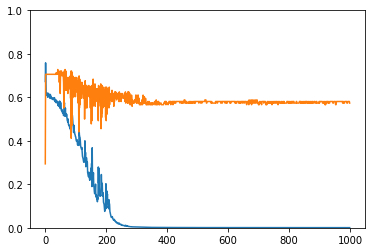

0.5769230769230769


In [5]:
# Different solver
classifier_norm_1 = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=1000, 
                           activation = 'relu',
                           solver='adam', 
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0
                           #)
                           ,early_stopping=True, n_iter_no_change=1000, 
                           validation_fraction=0.3)
classifier_norm_1.fit(km_normed_1, flt3_filtered)
plt.plot(classifier_norm_1.loss_curve_)
plt.plot(classifier_norm_1.validation_scores_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier_norm_1.predict(x_test)
print(roc_auc_score(y_test, y_pred))

/u/maruize/miniconda3/envs/stage2020/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


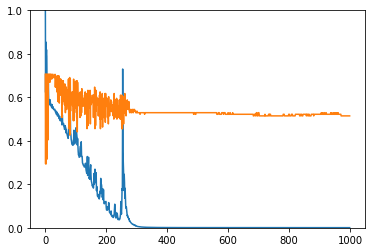

0.5128205128205128


In [3]:
# Smaller network size
classifier_small = MLPClassifier(hidden_layer_sizes=(1024,256,32), 
                           max_iter=1000, 
                           activation = 'relu',
                           solver='adam', 
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0
                           #)
                           ,early_stopping=True, n_iter_no_change=1000, 
                           validation_fraction=0.3)
classifier_small.fit(km_normed_1, flt3_filtered)
plt.plot(classifier_small.loss_curve_)
plt.plot(classifier_small.validation_scores_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier_small.predict(x_test)
print(roc_auc_score(y_test, y_pred))

/u/maruize/miniconda3/envs/stage2020/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


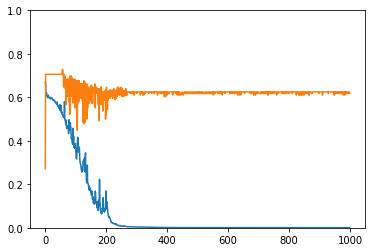

0.5384615384615384


In [5]:
# adam with initial lr=0.0005
classifier_norm_1 = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=1000, 
                           activation = 'relu',
                           solver='adam',
                           learning_rate_init=0.0005,
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0
                           #)
                           ,early_stopping=True, n_iter_no_change=1000, 
                           validation_fraction=0.3)
classifier_norm_1.fit(km_normed_1, flt3_filtered)
plt.plot(classifier_norm_1.loss_curve_)
plt.plot(classifier_norm_1.validation_scores_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier_norm_1.predict(x_test)
print(roc_auc_score(y_test, y_pred))

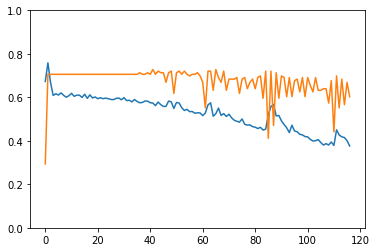

0.5769230769230769


In [5]:
# With actual early stopping
classifier_norm_1 = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=10000, 
                           activation = 'relu',
                           solver='adam', 
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0
                           #)
                           ,early_stopping=True, n_iter_no_change=50, 
                           validation_fraction=0.3)
classifier_norm_1.fit(km_normed_1, flt3_filtered)
plt.plot(classifier_norm_1.loss_curve_)
plt.plot(classifier_norm_1.validation_scores_)
plt.ylim(0, 1)
plt.show()
y_pred = classifier_norm_1.predict(x_test)
print(roc_auc_score(y_test, y_pred))

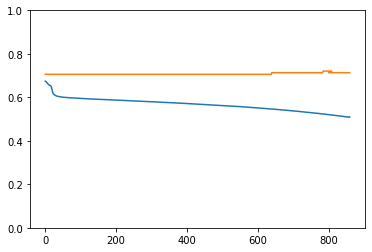

0.5384615384615384


In [6]:
# sgd with actual early stopping
classifier_early = MLPClassifier(hidden_layer_sizes=(2048,512,128,32,8), 
                           max_iter=10000, 
                           activation = 'relu', 
                           solver='sgd', 
                           learning_rate='constant',
                           learning_rate_init=0.0005,
                           tol=0, shuffle=True, 
                           random_state=3, verbose=0
                           #)
                           ,early_stopping=True, n_iter_no_change=50, 
                           validation_fraction=0.3)
classifier_early.fit(km_normed_1, flt3_filtered)
plt.plot(classifier_early.loss_curve_)
plt.plot(classifier_early.validation_scores_)
plt.ylim(0, 1)
plt.show()
y_pred_early = classifier_early.predict(x_test)
print(roc_auc_score(y_test, y_pred_early))